# Week 18 Homework: Neural Networks

### 1.	What is a neural network? What are the general steps required to build a neural network?

### 2.	Generally, how do you check the performance of a neural network? Why?

### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
* Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
* Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

In [2]:
abalone_df = pd.read_csv("abalone.data", names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Preprocessing: Integer encoding in "Sex" column
sex_map = {"I":0, "F":1, "M":2}
abalone_df["Sex"] = abalone_df["Sex"].map(sex_map)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#Add an "Age" column, calculated by number of rings plus 1.5
abalone_df['Age'] = abalone_df.Rings+1.5

In [6]:
#drop "Rings" column because of a 1-to-1 correspondence with "Age."
abalone_df.drop('Rings', axis=1, inplace=True)

In [7]:
abalone_df_new = abalone_df.copy()

In [8]:
abalone_corrMatrix = abalone_df_new.corr()
abalone_corrMatrix 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,0.448765,0.458245,0.417928,0.461238,0.440927,0.454658,0.445549,0.351822
Length,0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


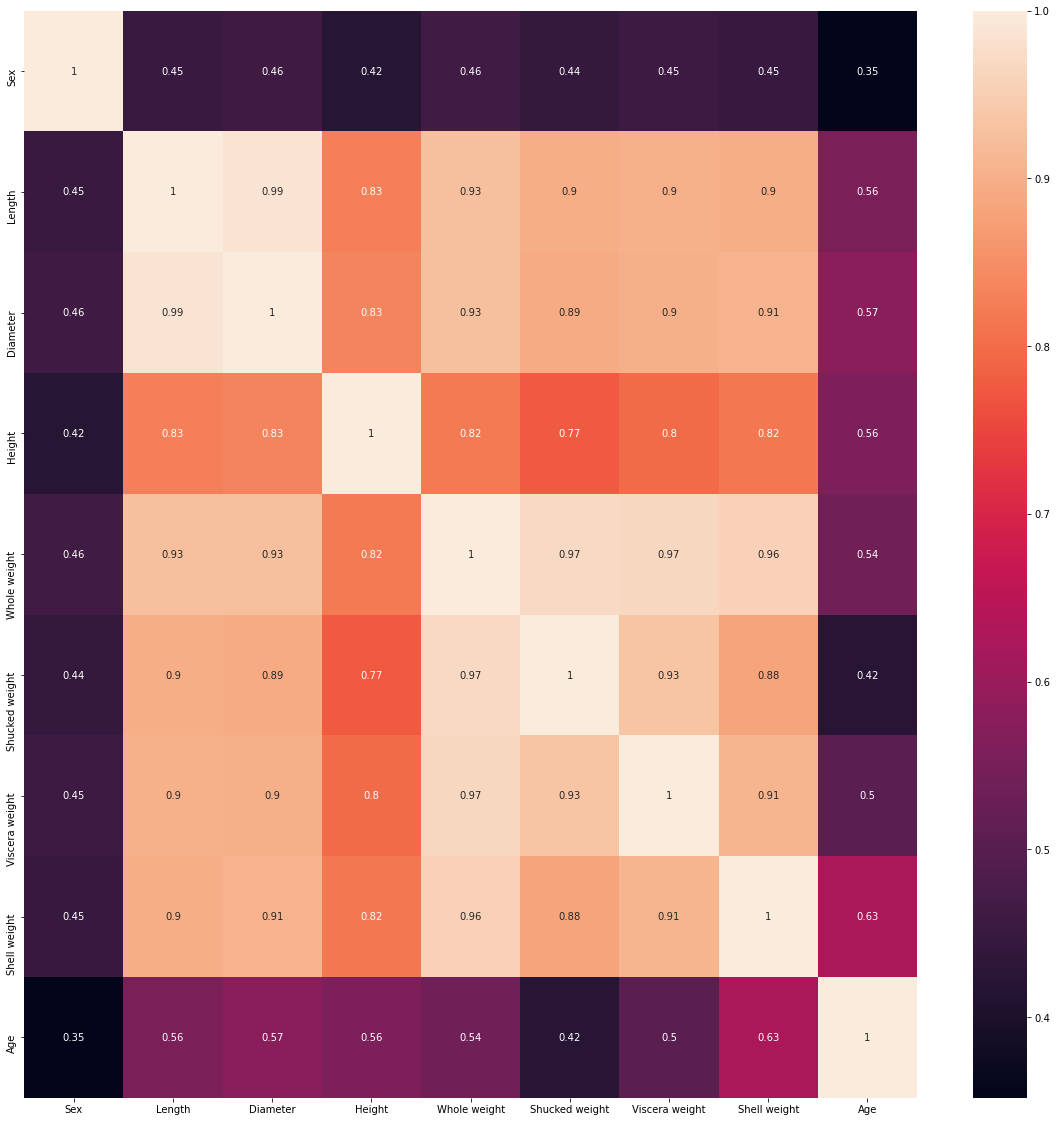

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(abalone_corrMatrix, annot=True)
plt.show()

In [10]:
#Because length and diameter have a correlation coefficient of 0.99, delete one.
#I chose diameter for deletion.
#Whole weight also had a 0.96-0.97 correlation with viscera weight, shell weight, and shucked weight,
#so I dropped bthe latter three.

In [11]:
columns_to_drop = ['Diameter','Viscera weight', 'Shucked weight', 'Shell weight']
abalone_df_new.drop(columns_to_drop, axis=1, inplace=True)
abalone_df_new.head()

,Sex,Length,Height,Whole weight,Age
0,2,0.455,0.095,0.5140,16.5
1,2,0.350,0.090,0.2255,8.5
2,1,0.530,0.135,0.6770,10.5
3,2,0.440,0.125,0.5160,11.5
4,0,0.330,0.080,0.2050,8.5


In [12]:
abalone_corrMatrix = abalone_df_new.corr()
abalone_corrMatrix 

,Sex,Length,Height,Whole weight,Age
Sex,1.000000,0.448765,0.417928,0.461238,0.351822
Length,0.448765,1.000000,0.827554,0.925261,0.556720
Height,0.417928,0.827554,1.000000,0.819221,0.557467
Whole weight,0.461238,0.925261,0.819221,1.000000,0.540390
Age,0.351822,0.556720,0.557467,0.540390,1.000000


In [92]:
#Set X and y for the models
X = abalone_df.drop('Age', axis=1).values
y = abalone_df['Age'].values.reshape(-1,1)

print(X.shape)
print(y.shape)

#import train test split
from sklearn.model_selection import train_test_split

#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

(4177, 8)
(4177, 1)


In [93]:
from sklearn.preprocessing import StandardScaler

#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
abalone_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4177 non-null   int64  
 1   Length        4177 non-null   float64
 2   Height        4177 non-null   float64
 3   Whole weight  4177 non-null   float64
 4   Age           4177 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 163.3 KB


In [95]:
import tensorflow as tf

In [96]:
import keras
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [110]:
from keras.optimizers import SGD
from keras.optimizers import Adam

In [98]:
#get the number of columns in the predictors array
n_cols = X_train.shape[1]
print(n_cols)

8


In [112]:
keras_model = Sequential()
keras_model.add(Dense(8, input_dim=8, activation='relu'))
keras_model.add(Dense(1, activation='linear'))

In [113]:
keras_model.compile(optimizer='Adam', loss='mean_squared_error')

#fit the model
keras_model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, epochs=100)

#get the predictions from the model
y_pred = keras_model.predict(X_test)

# Calculate the mean squared error
mse_keras = MSE(y_test, y_pred)
print("MSE = ", round(mse_keras, 2))

# Calculate the root mean squared error
rmse_keras = MSE(y_test, y_pred)**(1/2)
print("RMSE = ", round(rmse_keras, 2))

#Get r2 score
r2_keras = r2_score(y_test, y_pred)
print("R2 Score = ", round(r2_keras, 2))

MSE =  4.73
RMSE =  2.17
R2 Score =  0.56


### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

In [106]:
from sklearn.neighbors import KNeighborsRegressor

#KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_mse = MSE(y_test,y_pred)
knn_rmse = knn_mse ** (1/2)

# Calculate the mean squared error
mse_knn = MSE(y_test, y_pred)
print("MSE = ", round(mse_knn, 2))

# Calculate the root mean squared error
rmse_knn = MSE(y_test, y_pred)**(1/2)
print("RMSE = ", round(rmse_knn, 2))

#Get r2 score
r2_knn = r2_score(y_test, y_pred)
print("R2 Score = ", round(r2_knn, 2))

MSE =  5.45
RMSE =  2.33
R2 Score =  0.5


### 5.	Create a neural network using pytorch to predict the same result as question 3.

In [16]:
import torch

In [102]:
#Set X and y for the models
X = abalone_df.drop('Age', axis=1).values
y = abalone_df['Age'].values

#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [104]:
import torch.nn as nn
import torch.nn.functional as F #this has activation functions

# Creating tensors
X_train_pytorch = torch.FloatTensor(X_train)
X_test_pytorch = torch.FloatTensor(X_test)

y_train_pytorch = torch.FloatTensor(y_train)
y_test_pytorch = torch.FloatTensor(y_test)

print(X_train_pytorch.shape)
print(y_train_pytorch.shape)
print(X_test_pytorch.shape)
print(y_test_pytorch.shape)

y_train_pytorch = y_train_pytorch.view(-1, 1)
y_test_pytorch = y_test_pytorch.view(-1, 1)
print(y_train_pytorch)

torch.Size([3341, 8])
torch.Size([3341])
torch.Size([836, 8])
torch.Size([836])
tensor([[12.5000],
        [ 9.5000],
        [ 8.5000],
        ...,
        [12.5000],
        [10.5000],
        [ 7.5000]])


In [82]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=32, hidden2=32, out_features=1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [83]:
torch.manual_seed(42)

#instantiate the model
ann_model = ANN_Model()

In [84]:
# loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(ann_model.parameters(), lr = 0.04)

In [85]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 600
for epoch in range(n_epochs):
    y_pred_pytorch = ann_model.forward(X_train_pytorch)
    loss = loss_function(y_pred_pytorch, y_train_pytorch)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 122.26946258544922
Epoch number: 11 with loss: 23.1892147064209
Epoch number: 21 with loss: 8.845199584960938
Epoch number: 31 with loss: 6.754244327545166
Epoch number: 41 with loss: 5.545279502868652
Epoch number: 51 with loss: 5.064039707183838
Epoch number: 61 with loss: 4.843360424041748
Epoch number: 71 with loss: 4.699892044067383
Epoch number: 81 with loss: 4.617918968200684
Epoch number: 91 with loss: 4.5640869140625
Epoch number: 101 with loss: 4.517845153808594
Epoch number: 111 with loss: 4.476467132568359
Epoch number: 121 with loss: 4.439850807189941
Epoch number: 131 with loss: 4.40596866607666
Epoch number: 141 with loss: 4.37349796295166
Epoch number: 151 with loss: 4.341666221618652
Epoch number: 161 with loss: 4.309715270996094
Epoch number: 171 with loss: 4.281623363494873
Epoch number: 181 with loss: 4.25327205657959
Epoch number: 191 with loss: 4.232792854309082
Epoch number: 201 with loss: 4.2102742195129395
Epoch number: 211 with loss:

In [86]:
#predictions
y_pred_torch_test = []

with torch.no_grad():
    for i, data in enumerate(X_test_pytorch):
        prediction = ann_model(data)
        y_pred_torch_test.append(prediction.argmax().item())

In [87]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# Calculate the root mean square error
mse_pytorch = MSE(y_test_pytorch, y_pred_torch_test)
print("MSE = ", round(mse_pytorch, 2))

rmse_pytorch = MSE(y_test_pytorch, y_pred_torch_test)**(1/2)
print("RMSE = ", round(rmse_pytorch, 2))

#Get r2 score
r2_pytorch = r2_score(y_test_pytorch, y_pred_torch_test)
print('R2 Score = ' , round(r2_pytorch, 2))

MSE =  140.56
RMSE =  11.86
R2 Score =  -11.98


### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?